# Практическая статистика для специалистов Data Science

<img src="https://ozon-st.cdn.ngenix.net/multimedia/1023435348.jpg">

Книга рассчитана на специалистов в области Data Science, обладающих некоторым опытом работы с языком программирования R и имеющих предварительное понятие о математической статистике. В ней в удобной и легкодоступной форме представлены ключевые понятия из статистики, которые относятся к науке о данных, а также объяснено, какие понятия важны и полезны с точки зрения науки о данных, какие менее важны и почему. Подробно раскрыты темы: разведочный анализ данных, распределения данных и выборок, статистические эксперименты и проверка значимости, регрессия и предсказание, классификация, статистическое машинное обучение и обучение без учителя.

Ноутбук содержит примеры кода переписанного на Python.

## Глава 1. Разведочный анализ

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import weightedstats as ws
from statsmodels import robust
import matplotlib.pyplot as plt

%matplotlib inline

### Оценки центрального положения

In [6]:
data = pd.read_csv('data/state.csv')

print('Среднее значение :',data.loc[:,'Population'].mean())
print('Средне усеченное:',stats.trim_mean(data.loc[:,'Population'], 0.1))
print('Медиана :',np.median(data.loc[:,'Population']))
print('Среднее взвешенное :',np.average(data.loc[:,'Murder.Rate'],weights=data.loc[:,'Population']))
print('Взвешенная медиана :',ws.weighted_median(data.loc[:,'Murder.Rate'],weights=data.loc[:,'Population']))

Среднее значение : 6162876.3
Средне усеченное: 4783697.125
Медиана : 4436369.5
Среднее взвешенное : 4.44583398112
Взвешенная медиана : 4.4


**Ключевая идея:**

Базовая метрика для оценки центарльного положения является средней, но она чувствительна к экстремальным значениям.

Медиана и усеченное среднее более устойчивы.

### Оценки вариабельности

In [7]:
print('Стандартное отклонение : ',data.loc[:,'Population'].std())
q75, q25 = np.percentile(data.loc[:,'Population'], [75 ,25])
iqr = q75 - q25
print('Стандартное отклонение : ',iqr)
print('Среднее абсолютное отклонение: ',robust.mad(data.loc[:,'Population'], axis=0))

Стандартное отклонение :  6848235.347401142
Стандартное отклонение :  4847308.0
Среднее абсолютное отклонение:  3849876.146


In [13]:
def variance(x, sample=True):
    n = len(x)
    mean_x = np.mean(x)
    sum_squared_deviations = sum([ (x[i] - mean_x)**2 for i in range(n) ])
    denominator = (n - 1) if sample else n
    return sum_squared_deviations / denominator

print('Дисперсия, смещенная оценка : ', variance([1,2,6], sample=False))
print('Дисперсия, несмещенная оценка : ', variance([1,2,6], sample=True))

Дисперсия, смещенная оценка :  4.66666666667
Дисперсия, несмещенная оценка :  7.0


**Ключевая идея:**

Дисперсия и стандартное отклонение являются наиболее распространенным оценками вариабильности, но обе чувствительны к выбросам.

Более надежные показатели - средние и средние абсолютные отклонения от среднего и процентили (квантили).

### Обследование распределения данных

In [14]:
q05, q25, q50, q75, q95 = np.percentile(data.loc[:,'Murder.Rate'], [5,25,50,75,95])

In [17]:
q05, q25, q50, q75, q95 

(1.6000000000000001,
 2.4249999999999998,
 4.0,
 5.5499999999999989,
 6.5099999999999998)

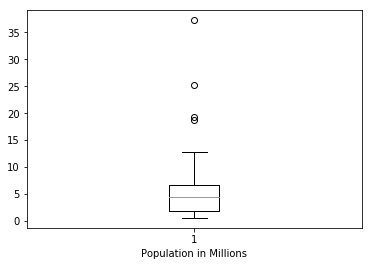

In [15]:
plt.boxplot((data.loc[:,'Population'])/1000000)
plt.xlabel('Population in Millions')
plt.show()

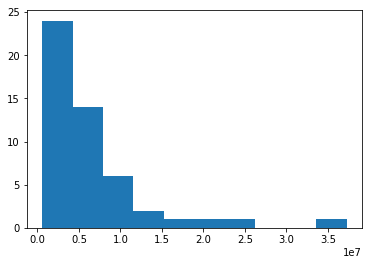

In [16]:
plt.hist(data.loc[:,'Population'])
plt.show()

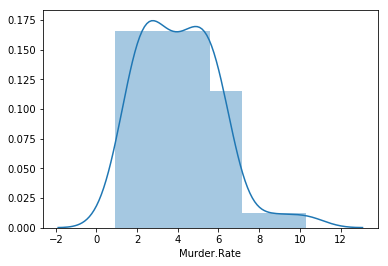

In [18]:
sns.distplot(data.loc[:,'Murder.Rate'])

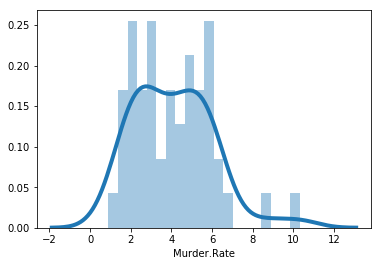

In [19]:
sns.distplot(data.loc[:,'Murder.Rate'],hist=True, kde=True,kde_kws={'linewidth': 4},bins=20)

### Обследование двоичных и категориальных данных

In [21]:
data2 = pd.read_csv('data/dfw_airline.csv')

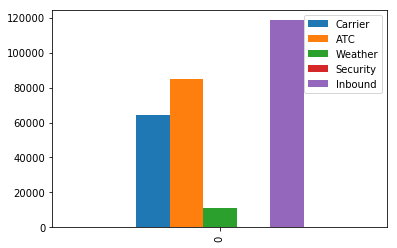

In [23]:
data2.plot(kind='bar')

**Ключевая идея:**

Категориальные данные суммируются в пропорциях и могут быть визуализированы на гистограмме.

### Корреляция

In [24]:
data3 = pd.read_csv('data/sp500_px.csv')

In [25]:
data4 = data3[(data3['Unnamed: 0'])>'2012-07-01'][['T','CTL','FTR','VZ','LVLT']]

In [26]:
data4.corr(method='pearson')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [27]:
data4.corr(method='spearman')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.495345,0.324027,0.664985,0.289232
CTL,0.495345,1.000000,0.371543,0.423900,0.251322
FTR,0.324027,0.371543,1.000000,0.269324,0.267911
VZ,0.664985,0.423900,0.269324,1.000000,0.245456
LVLT,0.289232,0.251322,0.267911,0.245456,1.000000


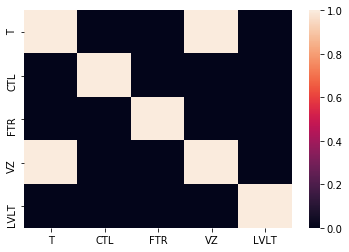

In [28]:
sns.heatmap(data4.corr()>0.6)

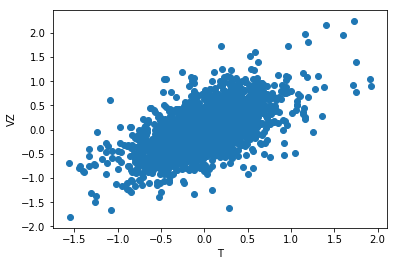

In [29]:
plt.scatter(data3['T'],data3['VZ'])
plt.xlabel('T')
plt.ylabel('VZ')
plt.show()

**Ключевая идея:**

Коэффициент корреляции измеряет степень, в которой две переменные связаны друг с другом.

Когда высокие значения v1 идут с высокими значениями v2, v1 и v2 положительно связаны.

Когда высокие значения v1 связаны с низкими значениями v2, v1 и v2 ассоциируются отрицательно.

Коэффициент корреляции является стандартизированной метрикой, поэтому он всегда находится в диапазоне от –1 (идеальная отрицательная корреляция) до +1 (идеальная положительная корреляция).

Коэффициент корреляции 0 указывает на отсутствие корреляции, но имейте в виду, что случайное расположение данных будет случайным образом давать как положительные, так и отрицательные значения для коэффициента корреляции.

### Исследование двух и более переменных

In [30]:
data5 = pd.read_csv('data/kc_tax.csv')
data6 = data5[(data5['SqFtTotLiving']>100) & (data5['SqFtTotLiving']<3500) & (data5['TaxAssessedValue']<750000)]

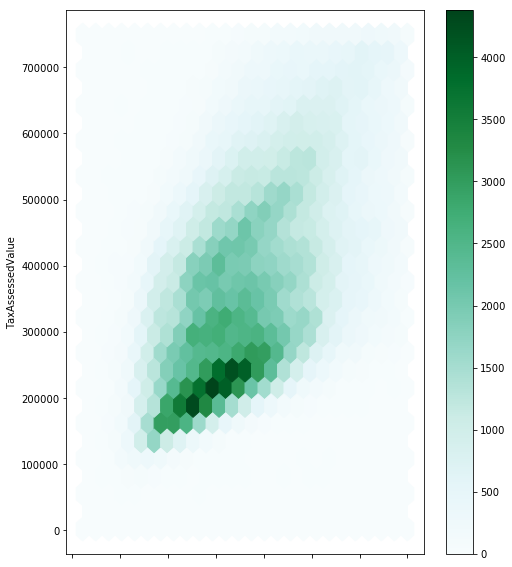

In [35]:
data6.plot(kind='hexbin',x=data6.columns[1],y=data6.columns[0],gridsize=25,figsize=(8,10))

### Для категориальных переменных

In [39]:
airline_stats = pd.read_csv('data/airline_stats.csv')
airline_stats.airline.value_counts() 
airline_stats = airline_stats.fillna(0)

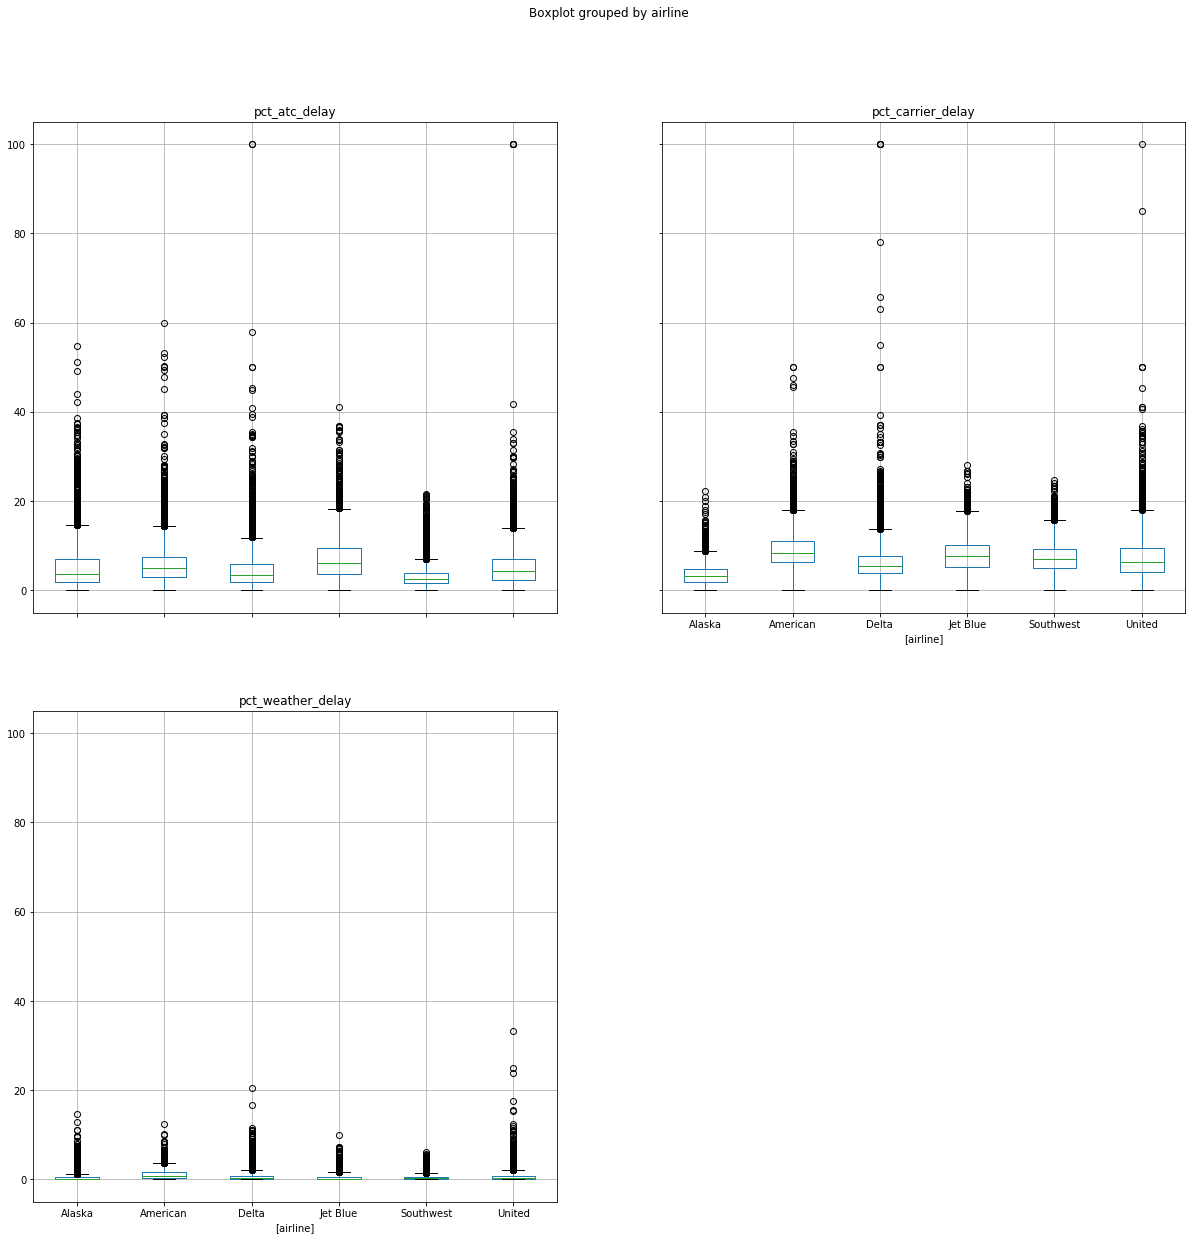

In [40]:
airline_stats.boxplot(by='airline',figsize=(20,20))
plt.show()

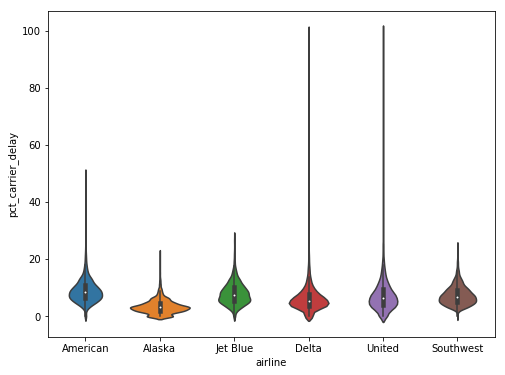

In [41]:
g = sns.violinplot(x="airline", y="pct_carrier_delay", data=airline_stats)
g.figure.set_size_inches(8,6)

## Глава 2. Распределения данных и выборок

In [44]:
import math, pylab
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

In [43]:
loans_income = pd.read_csv('data/loans_income.csv')
sp500_px = pd.read_csv('data/sp500_px.csv')

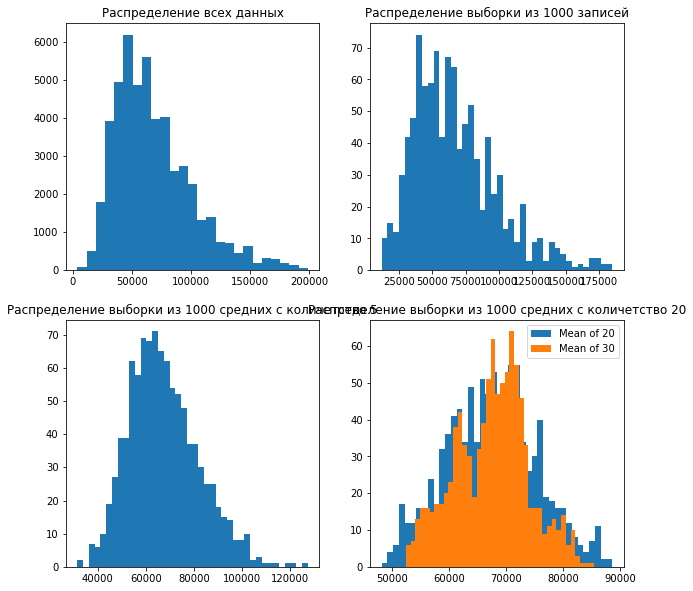

In [45]:
samples = loans_income.sample(n=1000)

sample_mean_5 = samples.rolling(5).mean().x
sample_mean_5 = sample_mean_5.dropna()

sample_mean_20 = samples.rolling(20).mean().x
sample_mean_20 = sample_mean_20.dropna()

sample_mean_30 = samples.rolling(30).mean().x
sample_mean_30 = sample_mean_30.dropna()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.hist(loans_income.x,bins=25)
plt.title('Распределение всех данных')

ax = fig.add_subplot(2,2,2)
ax.hist(samples.x,bins=40)
plt.title('Распределение выборки из 1000 записей')

#distribution of means of 5 numbers from 1000 samples:
ax = fig.add_subplot(2,2,3)
ax.hist(sample_mean_5,bins=40)
plt.title('Распределение выборки из 1000 средних с количетство 5')

#distribution of means of 20 numbers from 1000 samples:
ax = fig.add_subplot(2,2,4)
ax.hist(sample_mean_20,bins=40,label='Mean of 20')
ax.hist(sample_mean_30,bins=40,label='Mean of 30')
plt.title('Распределение выборки из 1000 средних с количетство 20')
ax.legend()
plt.show()

plt.show()

### Центральная предельная теорема

In [47]:
print('Стандартное отклонение : ',loans_income.x.std())
print('Среднее : ',loans_income.x.mean())
print('Медиана : ',np.median(loans_income.x))
print('Стандартная ошибка : ',stats.sem(loans_income.x, ddof=1))

Стандартное отклонение :  32872.03536985002
Среднее :  68760.51844
Медиана :  62000.0
Стандартная ошибка :  147.008211292


### Бутстрап

In [48]:
bootstrap_1000 = np.random.choice(loans_income.x,size=1000,replace=True)
bootstrap_10000 = np.random.choice(loans_income.x,size=10000,replace=True)
bootstrap_20000 = np.random.choice(loans_income.x,size=20000,replace=True)
arr_bootstraps = [bootstrap_1000,bootstrap_10000,bootstrap_20000]
len(arr_bootstraps)

3

**Ключевая идея:**

Бутстрап используется для повышения эффективности деревьев решений.

### Длиннохвостые распределения

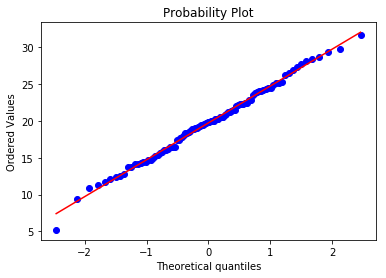

In [51]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [52]:
nflx = sp500_px.loc[:,'NFLX']

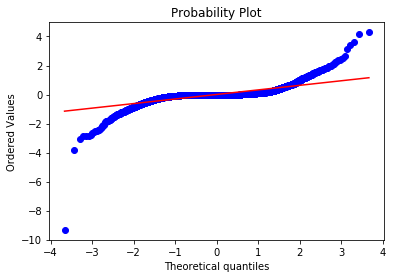

In [53]:
stats.probplot(nflx, dist="norm", plot=pylab)
pylab.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1768: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


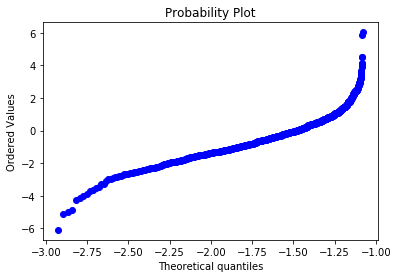

In [54]:
treated_nflx = np.diff(np.log(nflx))
stats.probplot(treated_nflx, dist="norm", plot=pylab,fit=True)
pylab.show()

## Глава 3. Статистические эксперименты и проверка значимости

### A/B тесты

In [55]:
df = pd.read_csv('data/web_page_data.csv')
page_a = df[df['Page']=='Page A']
page_b = df[df['Page']=='Page B']

In [60]:
df.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [57]:
page_a.Time.mean() - page_b.Time.mean()

-0.35666666666666713

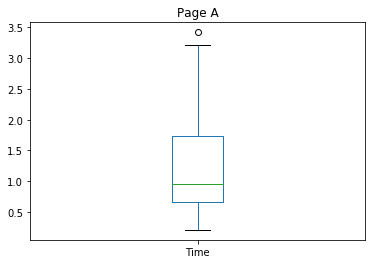

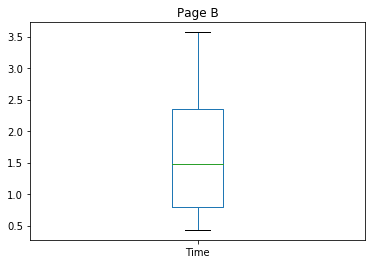

In [58]:
page_a.plot(kind='box',title='Page A')
page_b.plot(kind='box',title="Page B")
plt.show()

### Статистическая значимость и p-значение

In [61]:
web_test_results = pd.DataFrame({'Price A':[200,23539],'Price B':[182,22406]}, index=['Conversion','No conversion'])

web_test_results

,Price A,Price B
Conversion,200,182
No conversion,23539,22406


In [63]:
conversion_rate = web_test_results.loc['Conversion',] / (web_test_results.loc['No conversion',] + web_test_results.loc['Conversion',])

print(conversion_rate)

observed_difference = (conversion_rate['Price A'] - conversion_rate['Price B'])

print('Разница в конверсии:',observed_difference)

Price A    0.008425
Price B    0.008057
dtype: float64
Разница в конверсии: 0.000367579118206


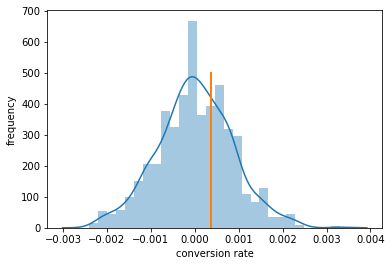

In [65]:
num_ones = web_test_results.loc['Conversion',].sum()
num_zeros = web_test_results.loc['No conversion',].sum()
a_size = web_test_results['Price A'].sum()
b_size = web_test_results['Price B'].sum()

all_data = [1] * num_ones + [0] * num_zeros
diffs = []

def proportion(x):
    return sum(x) / len(x)

for _ in range(1000):
    np.random.shuffle(all_data)
    diffs.append(proportion(all_data[:a_size]) - proportion(all_data[a_size:]))
    
ax = sns.distplot(diffs)
plt.xlabel('conversion rate')
plt.ylabel('frequency')
plt.plot([observed_difference, observed_difference],[0,500], linewidth=2)
plt.show()

In [66]:
z_score = (observed_difference - np.mean(diffs)) / np.std(diffs)

p_value = 1 - stats.norm.cdf(z_score)

print('P-value', p_value)

P-value 0.337560237947


## Глава 4. Регрессия и предсказание

In [67]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

### Простая линейная регрессия

In [69]:
lung_data = pd.read_csv('data/LungDisease.csv')

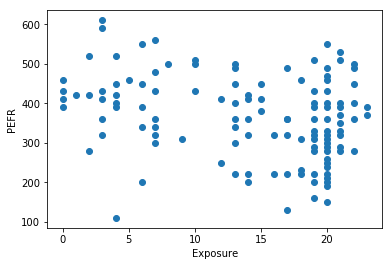

In [70]:
plt.scatter(lung_data['Exposure'],lung_data['PEFR'])
plt.xlabel('Exposure')
plt.ylabel('PEFR')
plt.show()

In [73]:
pefr = lung_data['PEFR'].values
expo = lung_data['Exposure'].values

In [74]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(expo.reshape(-1,1), pefr)
print(lin_reg.coef_, lin_reg.intercept_)

[-4.18457649] 424.582806574


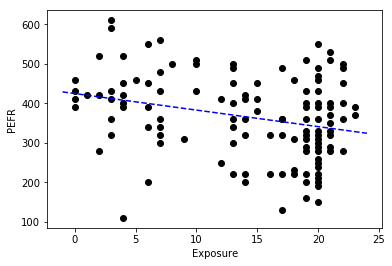

In [75]:
plt.plot(expo, pefr, 'ko')
plt.plot(range(-1,25), lin_reg.predict(np.array(range(-1,25)).reshape(-1,1)), 'b--')
plt.xlabel('Exposure')
plt.ylabel('PEFR')

In [76]:
lin_reg.score(expo.reshape(-1,1), pefr)

0.076741022862833796

In [77]:
print('Коээфициент (b1) :',lin_reg.coef_)
print('Свободный член(b0) :',lin_reg.intercept_)

Коээфициент (b1) : [-4.18457649]
Свободный член(b0) : 424.582806574


### Множественная линейная регрессия

In [80]:
house_data = pd.read_csv('data/house_sales.csv',sep='\t')
house_data.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [81]:
X = np.array(house_data['SqFtLot']).reshape(-1,1)
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

lin_reg.fit(X,y )

predictions_simple_linear_regression = lin_reg.predict(X)

print('Ошибка простой регресии :',mean_squared_error(predictions_simple_linear_regression,y)**(0.5))

Ошибка простой регресии : 381769.338818


In [82]:
X = np.array(house_data[['SqFtLot','SqFtTotLiving','Bathrooms','Bedrooms','BldgGrade']])
y = np.array(house_data['AdjSalePrice']).reshape(-1,1)

lin_reg.fit(X,y)

predictions_simple_linear_regression = lin_reg.predict(X)

print('Ошибка множественной регресии :',mean_squared_error(predictions_simple_linear_regression,y)**(0.5))

Ошибка множественной регресии : 261209.69156


## Глава 5. Классификация

In [84]:
df_loan = pd.read_csv('data/loan_data.csv')
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [85]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

In [86]:
df_loan['outcome'].value_counts(dropna=False)

paid off    22671
default     22671
Name: outcome, dtype: int64

In [87]:
df_loan['purpose'].value_counts(dropna=False)

debt_consolidation    25570
credit_card            7688
other                  3585
home_improvement       2609
small_business         1513
major_purchase         1281
car                     779
medical                 648
wedding                 545
moving                  456
house                   368
vacation                300
Name: purpose, dtype: int64

In [88]:
df_loan['home_'].value_counts(dropna=False)

MORTGAGE    20876
RENT        20744
OWN          3722
Name: home_, dtype: int64

In [89]:
df_loan['emp_len_'].value_counts(dropna=False)

 > 1 Year    43566
 < 1 Year     1776
Name: emp_len_, dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_loan['purpose_cat'] = le.fit_transform(df_loan['purpose'])
df_loan['home_cat'] = le.fit_transform(df_loan['home_'])
df_loan['emp_len_cat'] = le.fit_transform(df_loan['emp_len_'])
df_loan['outcome_cat'] = le.fit_transform(df_loan['outcome'])
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 25 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

In [91]:
X = df_loan[['purpose_cat', 'home_cat', 'emp_len_cat']].values
y = df_loan['outcome_cat'].values

### Наивный Байес

In [92]:
from sklearn.naive_bayes import GaussianNB

NB_gaus = GaussianNB()
NB_gaus.fit(X, y)

GaussianNB(priors=None)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y, NB_gaus.predict(X))

0.52714922147236554

### Дискриминантный анализ

In [94]:
X = df_loan[['borrower_score', 'payment_inc_ratio']].values
y = df_loan['outcome'].values

In [95]:
le = LabelEncoder()
y = le.fit_transform(y)

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [97]:
lda.coef_, lda.intercept_

(array([[ 4.53307338, -0.07584599]]), array([-1.6528207]))

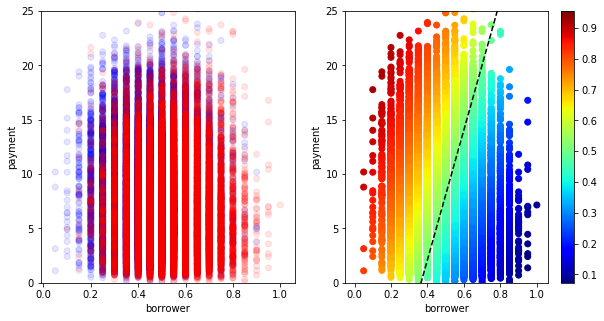

In [98]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.1)
plt.xlabel('borrower')
plt.ylabel('payment')
plt.ylim([0,25])
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=lda.predict_proba(X)[:,0], cmap='jet')
plt.plot([0, 1], [-lda.intercept_[0]/lda.coef_[0][1], 
                  -(lda.intercept_[0]+lda.coef_[0][0])/lda.coef_[0][1]], 'k--')
plt.xlabel('borrower')
plt.ylabel('payment')
plt.ylim([0,25])
plt.colorbar()

In [99]:
X_lda = lda.transform(X)

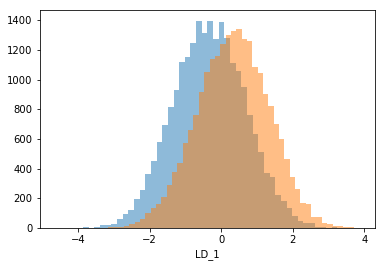

In [100]:
plt.hist(X_lda[y==0], bins=50, alpha=0.5)
plt.hist(X_lda[y==1], bins=50, alpha=0.5)
plt.xlabel('LD_1')

### Логистическая регрессия

In [102]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 25 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

In [103]:
df_loan['purpose_'].value_counts()

debt_consolidation    25570
credit_card            7688
other                  4886
home_improvement       2977
major_purchase         2060
small_business         1513
medical                 648
Name: purpose_, dtype: int64

In [104]:
df_loan['home_'].value_counts()

MORTGAGE    20876
RENT        20744
OWN          3722
Name: home_, dtype: int64

In [105]:
df_loan['emp_len_'].value_counts()

 > 1 Year    43566
 < 1 Year     1776
Name: emp_len_, dtype: int64

In [106]:
from tensorflow import keras

def one_hot_encoder(df, name, dof=False):
    X = df[name].values
    X = LabelEncoder().fit_transform(X)
    X = keras.utils.to_categorical(X)
    return X if not dof else X[:,:len(X[0])-1]

X_0 = df_loan[['payment_inc_ratio']].values
X_1 = one_hot_encoder(df_loan, 'purpose_', dof=True)
X_2 = one_hot_encoder(df_loan, 'home_', dof=True)
X_3 = one_hot_encoder(df_loan, 'emp_len_', dof=True)
X_4 = df_loan[['borrower_score']].values
y = one_hot_encoder(df_loan, 'outcome', dof=True).ravel()

X = np.hstack((X_0, X_1, X_2, X_3, X_4))

In [107]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg.fit(X, y)
accuracy_score(y, logit_reg.predict(X))

0.63669445547174808

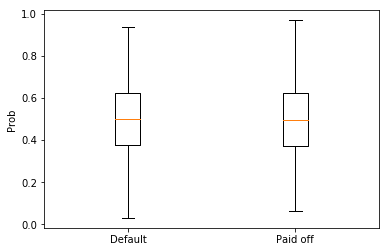

In [108]:
plt.boxplot(logit_reg.predict_proba(X), sym='k')
plt.xticks(range(1,3), ['Default', 'Paid off'])
plt.ylabel('Prob')

In [109]:
np.exp(logit_reg.coef_)

array([[ 1.08316272,  0.30548897,  0.39168971,  0.45861709,  0.38446982,
         0.51083034,  0.56777416,  0.85510489,  0.89731622,  1.42628819,
         0.01036053]])

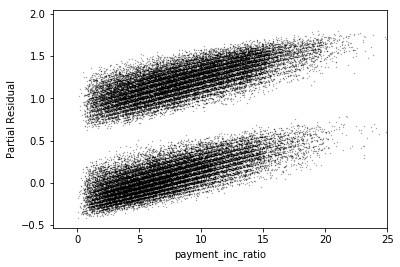

In [110]:
partialRes = y - logit_reg.predict_proba(X)[:,0] + 1./(1 + 
                            np.exp(-logit_reg.coef_[0][0] * X[:,0].ravel()))
plt.scatter(X[:,0], partialRes, alpha=0.5, s=0.1, c='k')
plt.xlim([-2,25])
plt.xlabel('payment_inc_ratio')
plt.ylabel('Partial Residual')

### Оценивание моделей классификации

In [111]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, logit_reg.predict(X))

array([[14529,  8142],
       [ 8331, 14340]], dtype=int64)

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y, logit_reg.predict(X)))

             precision    recall  f1-score   support

        0.0       0.64      0.64      0.64     22671
        1.0       0.64      0.63      0.64     22671

avg / total       0.64      0.64      0.64     45342



In [114]:
recall = []
specificity = []
for threshold in np.arange(0,1,0.01):
    tp, fn, fp, tn = confusion_matrix(y, 
        np.array(logit_reg.predict_proba(X)[:,1].ravel()>threshold).astype(int)).ravel()
    recall.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

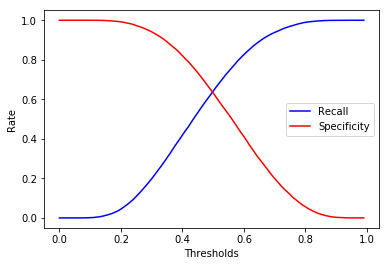

In [115]:
plt.plot(np.arange(0,1,0.01), recall, 'b-', label='Recall')
plt.plot(np.arange(0,1,0.01), specificity, 'r-', label='Specificity')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()

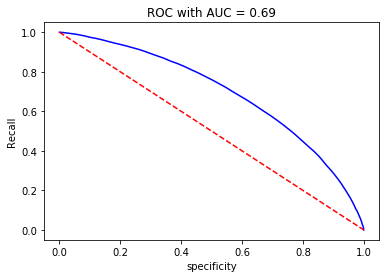

In [116]:
from sklearn.metrics import auc

plt.plot(specificity, recall, 'b-')
plt.plot([0,1], [1,0], 'r--')
plt.title('ROC with AUC = {0:.2f}'.format(auc(specificity, recall)))
plt.xlabel('specificity')
plt.ylabel('Recall')

In [117]:
a = pd.DataFrame(data={'1': ['abcd'] * 4, '2': ['dcba'] * 4})
print(a)
a['1'].apply(lambda x: x[:2])

      1     2
0  abcd  dcba
1  abcd  dcba
2  abcd  dcba
3  abcd  dcba


0    ab
1    ab
2    ab
3    ab
Name: 1, dtype: object

## Глава 6. Статистическое машинное обучение

In [118]:
df_loan200 = pd.read_csv('data/loan200.csv')
df_loan200.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [119]:
df_loan200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
outcome              201 non-null object
payment_inc_ratio    201 non-null float64
dti                  201 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [120]:
df_loan200['outcome'].value_counts()

paid off    104
default      96
target        1
Name: outcome, dtype: int64

### K ближайших соседей

In [121]:
X = df_loan200.iloc[1:][['payment_inc_ratio', 'dti']].values

In [122]:
y = df_loan200.iloc[1:]['outcome'].values

In [123]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

knn = Pipeline(steps=[
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=20))
])

knn.fit(X, y)
print('Acc:', accuracy_score(y, knn.predict(X)))
knn.predict_proba([df_loan200.iloc[0][['payment_inc_ratio', 'dti']].values])

Acc: 0.625


array([[ 0.45,  0.55]])

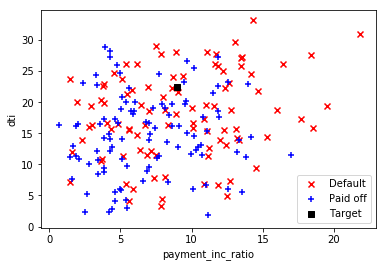

In [125]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='x', color='r', label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', color='b', label='Paid off')
plt.scatter(df_loan200.iloc[0]['payment_inc_ratio'],
            df_loan200.iloc[0]['dti'], marker='s', color='k', label='Target')
plt.grid(False)
plt.xlabel('payment_inc_ratio')
plt.ylabel('dti')
plt.legend()

### Дерево решений

In [127]:
X = df_loan[['borrower_score', 'payment_inc_ratio']].values

In [128]:
y = df_loan['outcome'].values

In [129]:
le = LabelEncoder()
y = le.fit_transform(y)

In [130]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_impurity_split=0.01)
tree_clf.fit(X, y)
accuracy_score(y, tree_clf.predict(X))

C:\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


0.62754179348065808

In [131]:
tree_clf.feature_importances_

array([ 0.73216622,  0.26783378])

(0, 30)

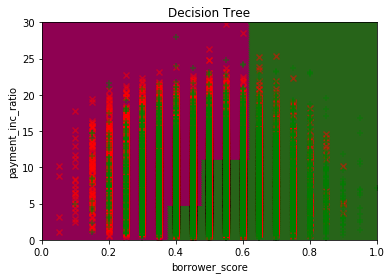

In [132]:
xp, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=tree_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Decision Tree')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

### Случайный лес

In [133]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
forest_clf.fit(X, y)
print('Acc:', accuracy_score(y, forest_clf.predict(X)))
forest_clf.feature_importances_

Acc: 0.630761766133


array([ 0.6841338,  0.3158662])

(0, 30)

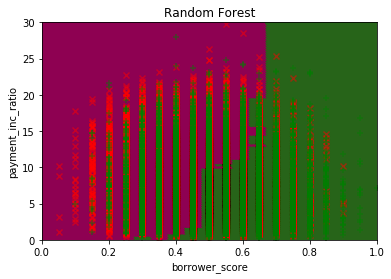

In [134]:
xp, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=forest_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Random Forest')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

In [135]:
forest_clf.oob_score

False

### Ada Boost

In [136]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=50)
ada_clf.fit(X, y)
print('Acc:', accuracy_score(y, ada_clf.predict(X)))

Acc: 0.629614926558


(0, 30)

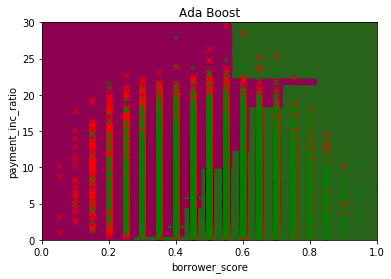

In [137]:
xp, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=ada_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Ada Boost')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

### Gradient Boost

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

gd_clf = GradientBoostingClassifier(n_estimators=50, subsample=0.63, learning_rate=0.05)
gd_clf.fit(X, y)
print('Acc:', accuracy_score(y, gd_clf.predict(X)))

Acc: 0.629703144987


(0, 30)

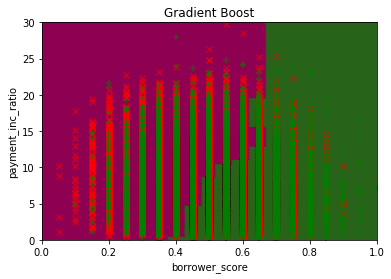

In [139]:
p, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=gd_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Gradient Boost')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

In [140]:
iter_acc = []
for i, y_pred in enumerate(gd_clf.staged_predict(X)):
    iter_acc.append(accuracy_score(y, y_pred.ravel()))

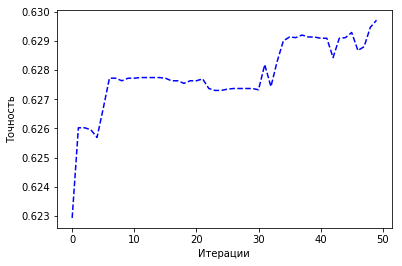

In [141]:
plt.plot(range(len(iter_acc)), iter_acc, 'b--')
plt.xlabel('Итерации')
plt.ylabel('Точность')